In [1]:
# Imports section
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import statistics 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Read the file in the format given
text=""
nLines=0
nAttributes=0
nClasses=0
attributesName = []
data = []
dataPerAttribute = []
classes = []
try:
    with open("cre300.txt","r") as file:
        count=0
        for line in file:
            if count < 3:
                if count == 0:
                    nLines = int(line.strip())
                else:
                    if count == 1:
                        nAttributes = int(line.strip())
                        for i in range(1,nAttributes+1):
                            attributesName.append("att"+str(i))
                            dataPerAttribute.append([])
                    else:
                        if count == 2:
                            nClasses = int(line.strip())
            else:
                split_string_S = line.strip().split(',')
                
                count_split = 0
                split_string_n = []
                for split in split_string_S:
                    if count_split >= nAttributes:
                        split_string_n.append(int(split))
                    else:
                        split_string_n.append(float(split))
                    count_split += 1
                    
                data.append(split_string_n)
                classes.append(split_string_n[nAttributes])
                n_attribute = 0
                for attribute in split_string_n:
                    if n_attribute >= nAttributes:
                        break
                    else:
                        dataPerAttribute[n_attribute].append(attribute)
                        n_attribute += 1
            count += 1
        print("EOF reached")
except FileNotFoundError:
    text="Archivo no existe"
    exit()
finally:
    file.close()
    # print(str(nLines) + "\n")
    # print(str(nAttributes) + "\n")
    # print(str(nClasses) + "\n")
    # print(attributesName)
    # print(data)

EOF reached


In [3]:
# Turning the data into a DataFrame python object
columns_ = attributesName[:]
columns_.append("target")

dataFrame = pd.DataFrame(data=data, columns=columns_)
dataFrame

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att142,att143,att144,att145,att146,att147,att148,att149,att150,target
0,0.80,0.97,0.13,0.11,0.16,0.33,0.12,0.69,0.64,0.04,...,0.15,0.33,0.28,0.02,0.24,0.86,0.71,0.23,0.96,0
1,0.66,0.26,0.69,0.17,0.59,0.73,0.53,0.91,0.82,0.30,...,0.41,0.50,0.58,0.57,0.98,0.58,0.77,0.04,0.81,2
2,0.60,0.97,0.36,0.49,0.96,0.50,0.97,0.25,0.90,0.46,...,0.61,0.44,0.42,0.20,0.50,0.73,0.79,0.39,0.11,2
3,0.82,0.96,0.12,0.11,0.15,0.33,0.13,0.70,0.64,0.05,...,0.14,0.33,0.29,0.02,0.24,0.85,0.70,0.24,0.95,0
4,0.54,0.21,0.06,0.86,0.89,0.91,0.92,0.71,0.11,0.91,...,0.41,0.85,0.81,0.29,0.79,0.81,0.84,0.30,0.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.80,0.08,0.48,0.96,0.24,0.45,0.48,0.07,0.11,0.89,...,0.90,0.62,0.49,0.85,0.19,0.47,0.57,0.28,0.06,0
296,0.28,0.61,0.89,0.35,0.53,0.89,0.18,0.98,0.05,0.85,...,0.51,0.08,0.79,0.90,0.52,0.36,0.32,0.64,0.88,3
297,-0.01,0.80,0.49,0.93,0.85,0.38,0.43,0.13,0.68,0.23,...,0.37,0.07,0.05,0.23,0.69,0.96,0.95,0.10,0.66,0
298,0.50,0.84,0.97,0.19,0.04,0.57,0.45,0.04,0.48,0.12,...,0.48,0.87,0.53,0.56,0.08,0.79,0.24,0.44,0.31,1


In [4]:
# Separating out the features
x = dataFrame.loc[:, attributesName].values
# Separating out the target
y = dataFrame.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
# Creating the Principal Components
pcn = int(input('Number of principal components:'))
if pcn > nAttributes:
    print(str(nAttributes) + " is the maximum number of principal components")
    pcn = min([nAttributes,pcn])
else:
    if pcn <= 0:
        print("1 is the minimum number of principal components")
        pcn = max([1,pcn])
        
print ("Creating PCA with " + str(pcn) + " components")
pca = PCA(n_components=pcn)
principalComponents = pca.fit_transform(x)
pc_names = []
for i in range(1,pcn+1):
    pc_names.append("principal component "+ str(i))

principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)
principalDf 

Number of principal components:30
Creating PCA with 30 components


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30
0,-7.284268,4.459476,-3.604868,1.105804,3.650163,-1.915466,2.830621,-1.077365,0.188810,1.529022,...,0.719002,-0.156117,-0.598088,0.379558,-0.252688,0.769522,-0.253032,0.322777,0.081968,-0.004584
1,-3.256810,-4.594693,-2.143191,-1.839233,-1.179625,0.374644,0.036319,4.682433,0.965096,-3.478643,...,0.599128,-0.980934,0.142548,-1.851954,-0.992833,-1.288341,1.927935,1.080136,0.680225,0.219566
2,-3.657402,-2.966895,-0.808645,-4.053459,-2.018804,-4.561269,-1.867429,0.502701,3.115439,-1.012994,...,2.613155,0.022393,-0.751287,0.314881,-1.298620,-0.107293,-1.664958,0.759023,-0.349751,-0.080520
3,-7.264275,4.448198,-3.605602,1.168601,3.627502,-1.940645,2.878697,-1.088908,0.121641,1.540531,...,0.711648,-0.144575,-0.647096,0.289578,-0.270524,0.783606,-0.282610,0.318188,0.130825,-0.025593
4,4.063262,-3.741597,-5.350652,-2.769626,-2.219667,-2.677062,1.040789,1.988482,-0.110882,-0.934908,...,-1.303600,1.913263,0.359136,1.706325,-0.375631,-0.184921,-0.393489,-1.378639,0.119146,-0.369681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7.590012,-1.520785,0.607508,-0.385458,2.980440,-1.303808,1.901696,-5.237620,2.648945,-1.602354,...,0.525882,-0.382519,-0.224829,-0.765340,-0.316088,0.077878,-0.056438,-0.158814,-0.195566,0.523659
296,0.423420,0.410589,-0.844032,0.820383,0.970976,-0.889739,0.483451,2.170534,-0.174280,-1.181867,...,-1.468167,-0.347587,1.751929,0.358759,0.805943,1.258244,3.321077,0.241645,-0.041404,1.697656
297,0.029043,1.001381,0.588130,-1.147969,1.175533,-1.385245,-0.485040,-0.280236,1.870604,0.842737,...,2.854039,0.438765,5.195224,0.831560,0.049408,2.051308,-0.959388,0.255734,-1.292219,0.077430
298,2.871227,3.883604,3.174302,-1.865981,7.471608,-0.116185,-1.769632,6.073540,-0.642891,-0.825035,...,-0.223095,0.575351,-0.041652,1.015859,-0.964029,0.146441,-0.142952,-0.019841,0.540945,0.190124


In [6]:
#joining the standarized data with the targets
finalDf = pd.concat([principalDf, dataFrame[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,target
0,-7.284268,4.459476,-3.604868,1.105804,3.650163,-1.915466,2.830621,-1.077365,0.188810,1.529022,...,-0.156117,-0.598088,0.379558,-0.252688,0.769522,-0.253032,0.322777,0.081968,-0.004584,0
1,-3.256810,-4.594693,-2.143191,-1.839233,-1.179625,0.374644,0.036319,4.682433,0.965096,-3.478643,...,-0.980934,0.142548,-1.851954,-0.992833,-1.288341,1.927935,1.080136,0.680225,0.219566,2
2,-3.657402,-2.966895,-0.808645,-4.053459,-2.018804,-4.561269,-1.867429,0.502701,3.115439,-1.012994,...,0.022393,-0.751287,0.314881,-1.298620,-0.107293,-1.664958,0.759023,-0.349751,-0.080520,2
3,-7.264275,4.448198,-3.605602,1.168601,3.627502,-1.940645,2.878697,-1.088908,0.121641,1.540531,...,-0.144575,-0.647096,0.289578,-0.270524,0.783606,-0.282610,0.318188,0.130825,-0.025593,0
4,4.063262,-3.741597,-5.350652,-2.769626,-2.219667,-2.677062,1.040789,1.988482,-0.110882,-0.934908,...,1.913263,0.359136,1.706325,-0.375631,-0.184921,-0.393489,-1.378639,0.119146,-0.369681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7.590012,-1.520785,0.607508,-0.385458,2.980440,-1.303808,1.901696,-5.237620,2.648945,-1.602354,...,-0.382519,-0.224829,-0.765340,-0.316088,0.077878,-0.056438,-0.158814,-0.195566,0.523659,0
296,0.423420,0.410589,-0.844032,0.820383,0.970976,-0.889739,0.483451,2.170534,-0.174280,-1.181867,...,-0.347587,1.751929,0.358759,0.805943,1.258244,3.321077,0.241645,-0.041404,1.697656,3
297,0.029043,1.001381,0.588130,-1.147969,1.175533,-1.385245,-0.485040,-0.280236,1.870604,0.842737,...,0.438765,5.195224,0.831560,0.049408,2.051308,-0.959388,0.255734,-1.292219,0.077430,0
298,2.871227,3.883604,3.174302,-1.865981,7.471608,-0.116185,-1.769632,6.073540,-0.642891,-0.825035,...,0.575351,-0.041652,1.015859,-0.964029,0.146441,-0.142952,-0.019841,0.540945,0.190124,1


In [7]:
##Building models for the Ensemble
folds = int(input("Enter number of K-Folds for Cross Validation: "))
neighbors = int(input("Enter value of K-Nearest Neighbors: "))
kk = KNeighborsClassifier(n_neighbors=neighbors)
nb = GaussianNB()
hLayers = int(input("Enter number of Hidden Layers for the Neural Network: "))
layersSize=[]
for i in range(1,hLayers+1):
    layersSize.append(int(input("Number of perceptrons for the "+str(i)+"-th layer: ")))
activationFunction=input("activation{identity, logistic, tanh, relu}: ")
epochs = int(input("Number of iterations for the Neural Network: "))
moment = float(input("Momentum for the Neural Network[0-1]: "))
nn = MLPClassifier(hidden_layer_sizes=layersSize,solver='sgd',activation=activationFunction,max_iter=epochs,momentum=moment)

Enter number of K-Folds for Cross Validation: 5
Enter value of K-Nearest Neighbors: 5
Enter number of Hidden Layers for the Neural Network: 3
Number of perceptrons for the 1-th layer: 10
Number of perceptrons for the 2-th layer: 15
Number of perceptrons for the 3-th layer: 10
activation{identity, logistic, tanh, relu}: tanh
Number of iterations for the Neural Network: 2500
Momentum for the Neural Network[0-1]: 0.8


In [8]:
scores_KK = cross_val_score(kk, principalComponents, y.ravel(), cv=folds)
scores_NB = cross_val_score(nb, principalComponents, y.ravel(), cv=folds)
scores_NN = cross_val_score(nn, principalComponents, y.ravel(), cv=folds)
split_names= []
model_names =['K-Nearest Neighbors','Naive Bayes','Neural Network']
for i in range(1,folds+1):
    split_names.append("Fold "+str(i))
kk_df = pd.DataFrame(scores_KK,
                   columns=['K-Nearest Neighbors'],
                     index=split_names)
nb_df = pd.DataFrame(scores_NB,
                   columns=['Naive Bayes'],
                     index=split_names)
nn_df = pd.DataFrame(scores_NN,
                   columns=['Neural Network'],
                     index=split_names)
avg_models = [np.mean(scores_KK),
             np.mean(scores_NB),
             np.mean(scores_NN)]
avg_df = pd.DataFrame(avg_models,
                      columns=['Normal Cross Validation Average'],index=model_names)
kk_df

,K-Nearest Neighbors
Fold 1,0.950000
Fold 2,0.933333
Fold 3,0.916667
Fold 4,0.966667
Fold 5,0.883333


In [9]:
nb_df

,Naive Bayes
Fold 1,0.883333
Fold 2,0.883333
Fold 3,0.800000
Fold 4,0.900000
Fold 5,0.883333


In [10]:
nn_df

,Neural Network
Fold 1,0.983333
Fold 2,0.933333
Fold 3,0.950000
Fold 4,0.950000
Fold 5,0.983333


In [11]:
avg_df

,Normal Cross Validation Average
K-Nearest Neighbors,0.93
Naive Bayes,0.87
Neural Network,0.96


In [12]:
#Creating ensemble with normal cross validation
eclf = VotingClassifier(
        estimators=[('kn', kk), ('nb', nb), ('nnet', nn)],
         voting='hard')
eclf_scores = cross_val_score(eclf, principalComponents, y.ravel(), scoring='accuracy', cv=folds)
eclf_df = pd.DataFrame(eclf_scores,
                   columns=['Ensemble'],
                     index=split_names)
print("Accuracy: %0.4f (+/- %0.4f)" % (eclf_scores.mean(), eclf_scores.std() * 2))
eclf_df

Accuracy: 0.9400 (+/- 0.0400)


,Ensemble
Fold 1,0.950000
Fold 2,0.966667
Fold 3,0.916667
Fold 4,0.950000
Fold 5,0.916667


In [13]:
#Creating ensemble with stratified cross validation
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train.ravel())
    return model.score(x_test,y_test)
KFolds = StratifiedKFold(n_splits=folds)
eclf_scores= []
for train_index,test_index in KFolds.split(X=principalComponents,y=y):
    X_train,X_test,y_train,y_test = principalComponents[train_index],principalComponents[test_index],y[train_index],y[test_index]
    eclf_scores.append(get_score(eclf,X_train,X_test,y_train,y_test))
eclf_df = pd.DataFrame(eclf_scores,
                   columns=['Ensemble'],
                     index=split_names)
print("Accuracy: %0.4f (+/- %0.4f)" % (np.mean(eclf_scores), statistics.stdev(eclf_scores) * 2))
eclf_df

Accuracy: 0.9333 (+/- 0.0667)


,Ensemble
Fold 1,0.950000
Fold 2,0.966667
Fold 3,0.883333
Fold 4,0.950000
Fold 5,0.916667


C:\ProgramData\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
C:\ProgramData\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=

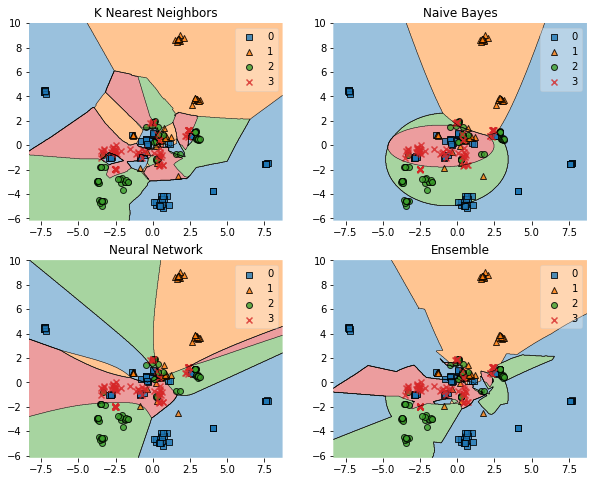

In [14]:
#Plotting the decision boundaries
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['K Nearest Neighbors', 'Naive Bayes', 'Neural Network', 'Ensemble']
for clf, lab, grd in zip([kk, nb, nn, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    x = finalDf.loc[:,['principal component 1','principal component 2']].values
    clf.fit(x, y.ravel())
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x, y=y.ravel(), clf=clf)
    plt.title(lab)

In [15]:
#Measuring the 
from sklearn.metrics import log_loss
#y_pred = cross_val_predict(eclf, principalComponents, y.ravel(), cv=folds)
eclf_soft = VotingClassifier(
        estimators=[('kn', kk), ('nb', nb), ('nnet', nn)],
         voting='soft')
KFolds = StratifiedKFold(n_splits=folds)
log_loss_array =[]
for train_index,test_index in KFolds.split(X=principalComponents,y=y):
    X_train,X_test,y_train,y_test = principalComponents[train_index],principalComponents[test_index],y[train_index],y[test_index]
    eclf_soft.fit(X_train,y_train.ravel())
    y_val_pred = eclf_soft.predict_proba(X_test)
    log_loss_array.append(log_loss(y_test.ravel(), y_val_pred))
ll_df = pd.DataFrame(log_loss_array,
                   columns=['Logarithmic Loss'],
                     index=split_names)
print("Average Logarithmic loss: %0.4f (+/- %0.4f)" % (np.mean(log_loss_array), statistics.stdev(log_loss_array) * 2))
ll_df

Average Logarithmic loss: 0.1810 (+/- 0.0698)


,Logarithmic Loss
Fold 1,0.143792
Fold 2,0.196435
Fold 3,0.231074
Fold 4,0.180013
Fold 5,0.153682
